1. Point estimates vs. distributions
2. Measures of variance
3. Using resampling (simulation) to bootstrap intuitions about results
4. Questions about Lab Report 1

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

url = 'https://osf.io/download/r7udh/'

df = pd.read_csv(url)
df

,Participant.ID,Version,Set,Subset,Baseword,Diversity,Item,Question,Response.Box,Response,Score
0,1,B2,B,2,shirt,low,hust,Earlier you read about a type of shirt that wa...,1,stretchy,3.0
1,1,B2,B,2,shirt,low,hust,Earlier you read about a type of shirt that wa...,2,can't be torn,NaN
2,1,B2,B,2,shirt,low,hust,Earlier you read about a type of shirt that wa...,3,stain proof,NaN
3,1,B2,B,2,shirt,low,hust,Earlier you read about a type of shirt that wa...,4,NaN,NaN
4,1,B2,B,2,shirt,low,hust,Earlier you read about a type of shirt that wa...,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5595,103,A1,A,2,umbrella,high,tace,Earlier you read about a type of umbrella that...,3,NaN,NaN
5596,103,A1,A,2,umbrella,high,tace,Earlier you read about a type of umbrella that...,4,NaN,NaN
5597,103,A1,A,2,umbrella,high,tace,Earlier you read about a type of umbrella that...,5,NaN,NaN
5598,103,A1,A,2,umbrella,high,tace,Earlier you read about a type of umbrella that...,6,NaN,NaN


In [3]:
len(set(df['Participant.ID']))

100

In [4]:
df = df.dropna()

In [5]:
df.shape

(800, 11)

In [6]:
list(df)

['Participant.ID',
 'Version',
 'Set',
 'Subset',
 'Baseword',
 'Diversity',
 'Item',
 'Question',
 'Response.Box',
 'Response',
 'Score']

<AxesSubplot:xlabel='Score', ylabel='Count'>

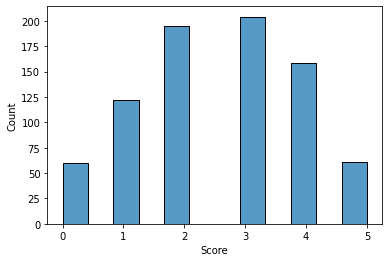

In [8]:
sns.histplot(data = df, x = 'Score')

<AxesSubplot:xlabel='Score', ylabel='Density'>

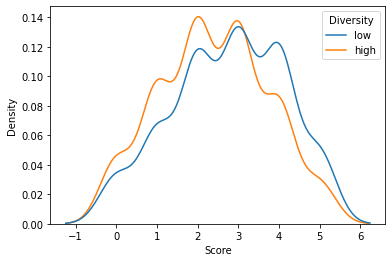

In [9]:
sns.kdeplot(data = df, x = 'Score', hue = 'Diversity')

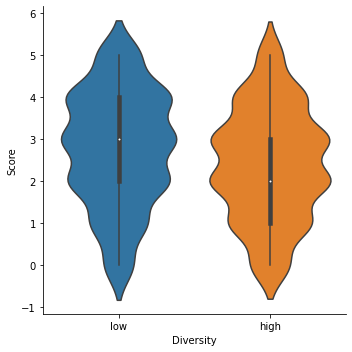

In [10]:
sns.catplot(data = df, x = 'Diversity', y = 'Score', kind = 'violin')

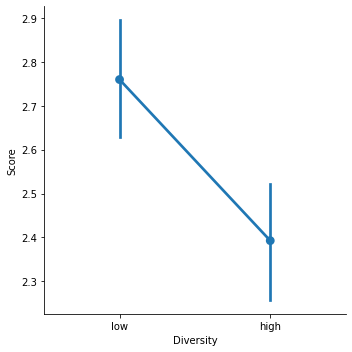

In [11]:
sns.catplot(data = df, x = 'Diversity', y = 'Score', kind = 'point')

In [12]:
df_low = df.loc[df['Diversity'] == 'low']
df_high = df.loc[df['Diversity'] == 'high']

In [13]:
print(df_low['Score'].mean())
print(df_high['Score'].mean())

2.76
2.3925


In [14]:
import numpy as np

sim_low = []
for i in range(10):
    sim_low.append(np.random.choice(df_low['Score'], 50, replace = True))

sim_high = []
for i in range(10):
    sim_high.append(np.random.choice(df_high['Score'], 50, replace = True))


In [15]:
sim_low

[array([4., 1., 5., 4., 5., 3., 4., 1., 2., 2., 2., 2., 4., 3., 1., 3., 3.,
        3., 4., 2., 4., 4., 2., 1., 2., 3., 4., 1., 2., 2., 3., 4., 3., 2.,
        2., 2., 1., 3., 4., 0., 1., 1., 5., 3., 3., 2., 4., 0., 2., 5.]),
 array([4., 2., 1., 5., 4., 3., 2., 4., 4., 3., 1., 1., 1., 4., 4., 4., 2.,
        3., 4., 4., 4., 1., 2., 2., 4., 2., 0., 3., 4., 4., 5., 3., 4., 1.,
        3., 1., 3., 3., 4., 3., 3., 4., 4., 3., 3., 4., 2., 1., 1., 1.]),
 array([4., 5., 3., 1., 1., 3., 3., 4., 4., 3., 3., 1., 4., 3., 1., 5., 3.,
        4., 2., 5., 3., 3., 3., 4., 3., 4., 3., 3., 2., 3., 3., 2., 2., 5.,
        3., 4., 2., 5., 1., 2., 3., 2., 0., 4., 2., 4., 3., 5., 2., 4.]),
 array([1., 4., 3., 3., 2., 2., 3., 4., 2., 3., 1., 3., 4., 4., 3., 0., 3.,
        5., 1., 3., 2., 4., 3., 4., 3., 4., 4., 2., 4., 0., 0., 0., 3., 0.,
        3., 4., 4., 3., 5., 0., 4., 3., 5., 4., 0., 5., 5., 2., 4., 1.]),
 array([5., 1., 2., 2., 2., 4., 5., 3., 1., 5., 2., 3., 2., 2., 5., 4., 2.,
        2., 3., 1., 

<AxesSubplot:xlabel='id', ylabel='score'>

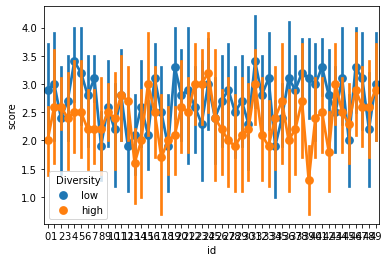

In [16]:
import numpy as np

sim_low = []
for i in range(10):
    sim_low.append(np.random.choice(df_low['Score'], 50, replace = True))

sim_high = []
for i in range(10):
    sim_high.append(np.random.choice(df_high['Score'], 50, replace = True))

sim_data_low = pd.DataFrame(sim_low)
sim_means_low = sim_data_low.mean()

sim_data_high = pd.DataFrame(sim_high)
sim_means_high = sim_data_high.mean()

sim_data_low = sim_data_low.melt(var_name = 'id', value_name = 'score')
sim_data_high = sim_data_high.melt(var_name = 'id', value_name = 'score')

sim_data_low['Diversity'] = ['low']*len(sim_data_low)
sim_data_high['Diversity'] = ['high']*len(sim_data_high)

sim_data_long = pd.concat([sim_data_low,sim_data_high])

sns.pointplot(data = sim_data_long, x = 'id', y = 'score', hue = 'Diversity', linestyle = ' ')



In [17]:
sim_low = []
for i in range(10):
    sim_low.append(np.random.choice(df_low['Score'], 50, replace = True))

sim_high = []
for i in range(10):
    sim_high.append(np.random.choice(df_high['Score'], 50, replace = True))

sim_data_low = pd.DataFrame(sim_low)
sim_means_low = sim_data_low.mean()

sim_data_high = pd.DataFrame(sim_high)
sim_means_high = sim_data_high.mean()

sim_data_low = sim_data_low.melt(var_name = 'id', value_name = 'score')
sim_data_high = sim_data_high.melt(var_name = 'id', value_name = 'score')

sim_data_low['Diversity'] = ['low']*len(sim_data_low)
sim_data_high['Diversity'] = ['high']*len(sim_data_high)

sim_data_long = pd.concat([sim_data_low,sim_data_high])

#sns.pointplot(data = sim_data_long, x = 'id', y = 'score', hue = 'Diversity', linestyle = ' ')

sim_data_long = sim_data_long.groupby(['id', 'Diversity']).mean()
sim_data_long.reset_index(inplace = True)
sim_data_long

,id,Diversity,score
0,0,high,2.6
1,0,low,3.2
2,1,high,2.3
3,1,low,2.8
4,2,high,2.1
...,...,...,...
95,47,low,3.1
96,48,high,2.2
97,48,low,2.8
98,49,high,3.0


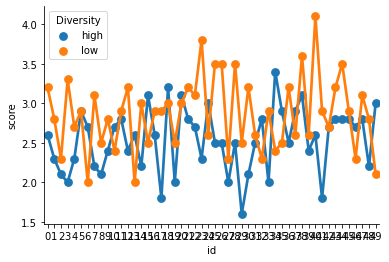

In [18]:
sns.pointplot(data = sim_data_long, 
              x = 'id', 
              y = 'score', 
              hue = 'Diversity')
sns.despine()

In [19]:
compare = zip(sim_data_long.loc[sim_data_long['Diversity'] == 'high']['score'],
              sim_data_long.loc[sim_data_long['Diversity'] == 'low']['score'])
compare = list(compare)
compare

[(2.6, 3.2),
 (2.3, 2.8),
 (2.1, 2.3),
 (2.0, 3.3),
 (2.3, 2.7),
 (2.9, 2.9),
 (2.7, 2.0),
 (2.2, 3.1),
 (2.1, 2.5),
 (2.4, 2.8),
 (2.7, 2.4),
 (2.8, 2.9),
 (2.4, 3.2),
 (2.6, 2.0),
 (2.2, 3.0),
 (3.1, 2.5),
 (2.6, 2.9),
 (1.8, 2.9),
 (3.2, 3.0),
 (2.0, 2.5),
 (3.1, 3.0),
 (2.8, 3.2),
 (2.7, 3.1),
 (2.3, 3.8),
 (3.0, 2.6),
 (2.5, 3.5),
 (2.5, 3.5),
 (2.0, 2.3),
 (2.5, 3.5),
 (1.6, 2.5),
 (2.1, 3.2),
 (2.5, 2.6),
 (2.8, 2.3),
 (2.0, 2.9),
 (3.4, 2.4),
 (2.9, 2.5),
 (2.5, 3.2),
 (2.9, 2.6),
 (3.1, 3.6),
 (2.4, 2.6),
 (2.6, 4.1),
 (1.8, 2.9),
 (2.7, 2.7),
 (2.8, 3.2),
 (2.8, 3.5),
 (2.8, 2.9),
 (2.7, 2.3),
 (2.8, 3.1),
 (2.2, 2.8),
 (3.0, 2.1)]

In [20]:
highs = [1 for x in compare if x[0]>x[1]]
lows = [1 for x in compare if x[0]<x[1]]
same = [1 for x in compare if x[0]==x[1]]
print(sum(highs))
print(sum(lows))
print(sum(same))

13
35
2
